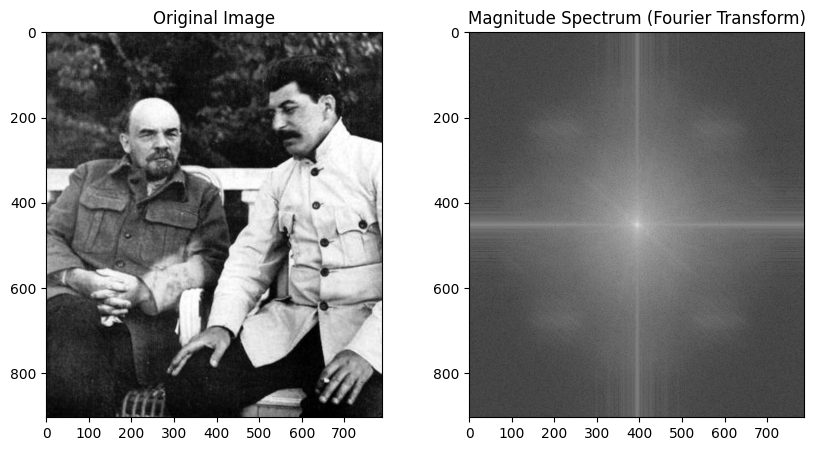

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load an image (replace 'image.jpg' with your image file)
image = plt.imread('img.jpg') 
gray_image = np.mean(image, axis=2)  # Convert to grayscale if needed

# Apply the 2D Fourier Transform
fourier_transform = np.fft.fft2(gray_image) 
fourier_transform_shifted = np.fft.fftshift(fourier_transform) # Shift for visualization

# Calculate magnitude spectrum
magnitude_spectrum = np.abs(fourier_transform_shifted)

# Visualize the original image and its spectrum
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray') # Log scale for visibility
plt.title('Magnitude Spectrum (Fourier Transform)')

plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load an image (replace 'image.jpg' with your image file)
image = Image.open('img.jpg').convert('L')  # Convert to grayscale
image_array = np.array(image) 

# Perform 2D Fourier Transform
f_transform = np.fft.fft2(image_array)
f_transform_shifted = np.fft.fftshift(f_transform)

In [3]:
def ideal_low_pass_filter(shape, cutoff_frequency):
    """
    Creates an ideal low-pass filter in the frequency domain.

    Args:
        shape: The shape of the filter (same as the image).
        cutoff_frequency: The cutoff frequency (radius from center).

    Returns:
        A NumPy array representing the filter.
    """
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    filter_mask = np.zeros(shape)

    for r in range(rows):
        for c in range(cols):
            distance = np.sqrt((r - center_row)**2 + (c - center_col)**2)
            if distance <= cutoff_frequency:
                filter_mask[r, c] = 1

    return filter_mask

def ideal_high_pass_filter(shape, cutoff_frequency):
    """
    Creates an ideal high-pass filter in the frequency domain.

    Args:
        shape: The shape of the filter (same as the image).
        cutoff_frequency: The cutoff frequency (radius from center).

    Returns:
        A NumPy array representing the filter.
    """
    return 1 - ideal_low_pass_filter(shape, cutoff_frequency) 

In [4]:
# Define cutoff frequencies (adjust as needed)
cutoff_low = 50  # For low-pass filter
cutoff_high = 50  # For high-pass filter

# Create filters
low_pass_filter = ideal_low_pass_filter(image_array.shape, cutoff_low)
high_pass_filter = ideal_high_pass_filter(image_array.shape, cutoff_high)

# Apply filters in the frequency domain
filtered_low_pass = f_transform_shifted * low_pass_filter
filtered_high_pass = f_transform_shifted * high_pass_filter

# Inverse Fourier Transform to get back to spatial domain
filtered_image_low = np.fft.ifft2(np.fft.ifftshift(filtered_low_pass))
filtered_image_high = np.fft.ifft2(np.fft.ifftshift(filtered_high_pass))

# Take the real part (as pixel values should be real)
filtered_image_low = np.real(filtered_image_low)
filtered_image_high = np.real(filtered_image_high)

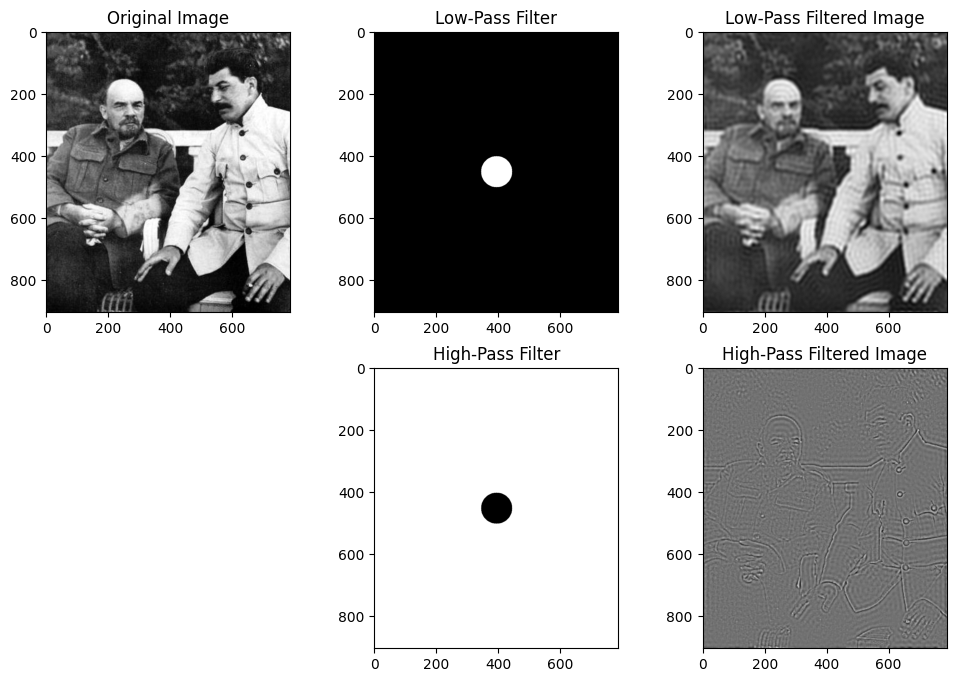

In [5]:
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')

plt.subplot(232)
plt.imshow(low_pass_filter, cmap='gray')
plt.title('Low-Pass Filter')

plt.subplot(233)
plt.imshow(filtered_image_low, cmap='gray')
plt.title('Low-Pass Filtered Image')

plt.subplot(235)
plt.imshow(high_pass_filter, cmap='gray')
plt.title('High-Pass Filter')

plt.subplot(236)
plt.imshow(filtered_image_high, cmap='gray')
plt.title('High-Pass Filtered Image')

plt.show()